# LABORATORIO 4-PROCESAMIENTO DIGITAL DE SEÑALES

* Julián Mauricio Sánchez Ceballos
* cc: 1001132830
* Universidad de Antioquia-Departamento de Ingeniería Electrónica y de Telecomunicaciones

In [1]:
# Setup de la practica se agrega el -q para que no imprima el log de la instalacion


%pip install numpy -q
%pip install matplotlib -q
%pip install scipy -q
%pip install pandas -q


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.simplefilter("ignore")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### 2.1. Procedimiento

1. La señal corresponde a datos de la tasa de cambio representativa del mercado (TRM), la cual mide la cantidad de pesos colombianos por un dólar de los Estados Unidos. El archivo `historical TRM.csv` contiene 6 columnas con la siguiente información:
    - Fecha  
    - Precio  
    - Apertura  
    - Máximo  
    - Mínimo  
    - Cambio  

    Para cargar este archivo utilice la librería pandas. Puede ayudarse del siguiente comando:  
    ```python
        
        def extract_currency(x):
            if isinstance(x, str):
                return(x.replace('%', '').replace(',', ''))
            return(x)
        
        df = pd.read csv('historical_TRM.csv', delimiter=',')
        #Para analizar su contenido
        print(df.head())
        senal=np.array(df['Precio'].apply(extract_currency).astype('float'))

    ```
    

In [34]:
def extract_currency(x):
    if isinstance(x, str):
        return(x.replace('%', '').replace(',', ''))
    return(x)
        
# Lectura del archivo CSV
df = pd.read_csv('historical_TRM.csv', delimiter=',')

# obtener las columnas que nos interesan
df['Precio'] = df['Precio'].apply(extract_currency).astype(float)
df['Maximo'] = df['Maximo'].apply(extract_currency).astype(float)
df['Fecha'] = pd.to_datetime(df['Fecha'])

df = df.sort_values(by='Fecha')



# calculo del periodo de muestreo.
delta = df['Fecha'].diff().dropna()

periodo_dias = delta.mean().days
periodo_semanas = periodo_dias / 7
periodo_anos = periodo_dias / 365.25

print(f"Periodo de muestreo: {periodo_dias:2f} dias, {periodo_semanas:2f} semanas, {periodo_anos:4f} años")




Periodo de muestreo: 7.000000 dias, 1.000000 semanas, 0.019165 años


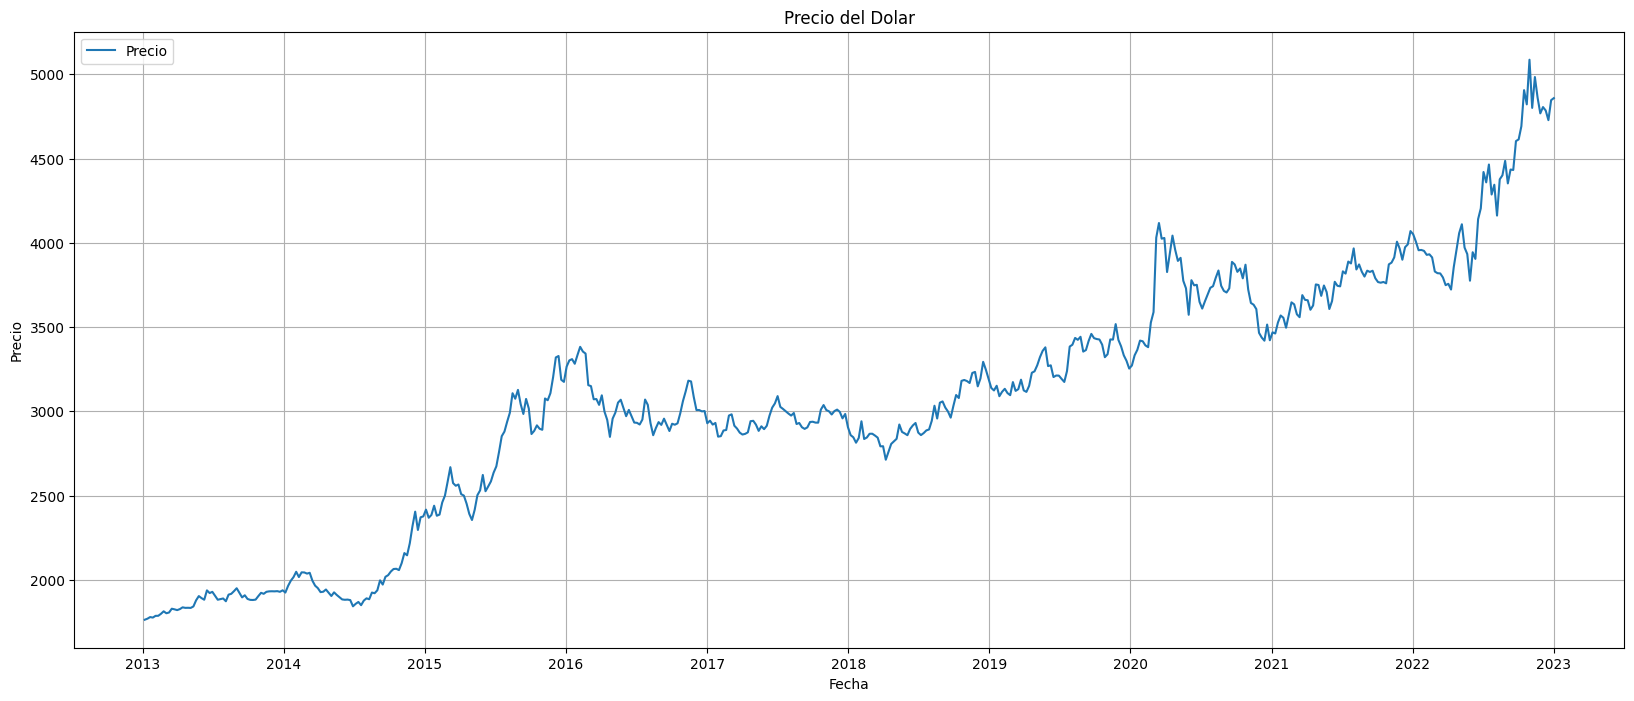

In [35]:
plt.figure(figsize=(20, 8))
plt.plot(df['Fecha'], df['Precio'], label='Precio')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precio del Dolar')
plt.legend()
plt.grid()
plt.show()

El precio del dolar muestra una clara tendencia al alza desde finales de del 2015 hasta lo que poco antes de que se dejaran de tomar datos a finales del 2023, hay varios momentos para destacar, de sucesos que pudieron afectar el alza de este precio, como lo es la caida del precio del petroleo en los años 2015 y 2016, ademas de factores sociales como la victoria del NO en el plebicito por la paz lo que genero incertidumbre tanto a nivel nacional como internacional, seguido por los cambios drasticos mostrados en 2020 producto de la pandemia y la crisis que se vivia en el planeta. y finalmente en el 2023 donde se especulaba un alza exagerada del dolar producto de la victoria de Gustavo Petro por las elecciones presidenciales, suceso que genero gran incertidumbre en el mercado. 

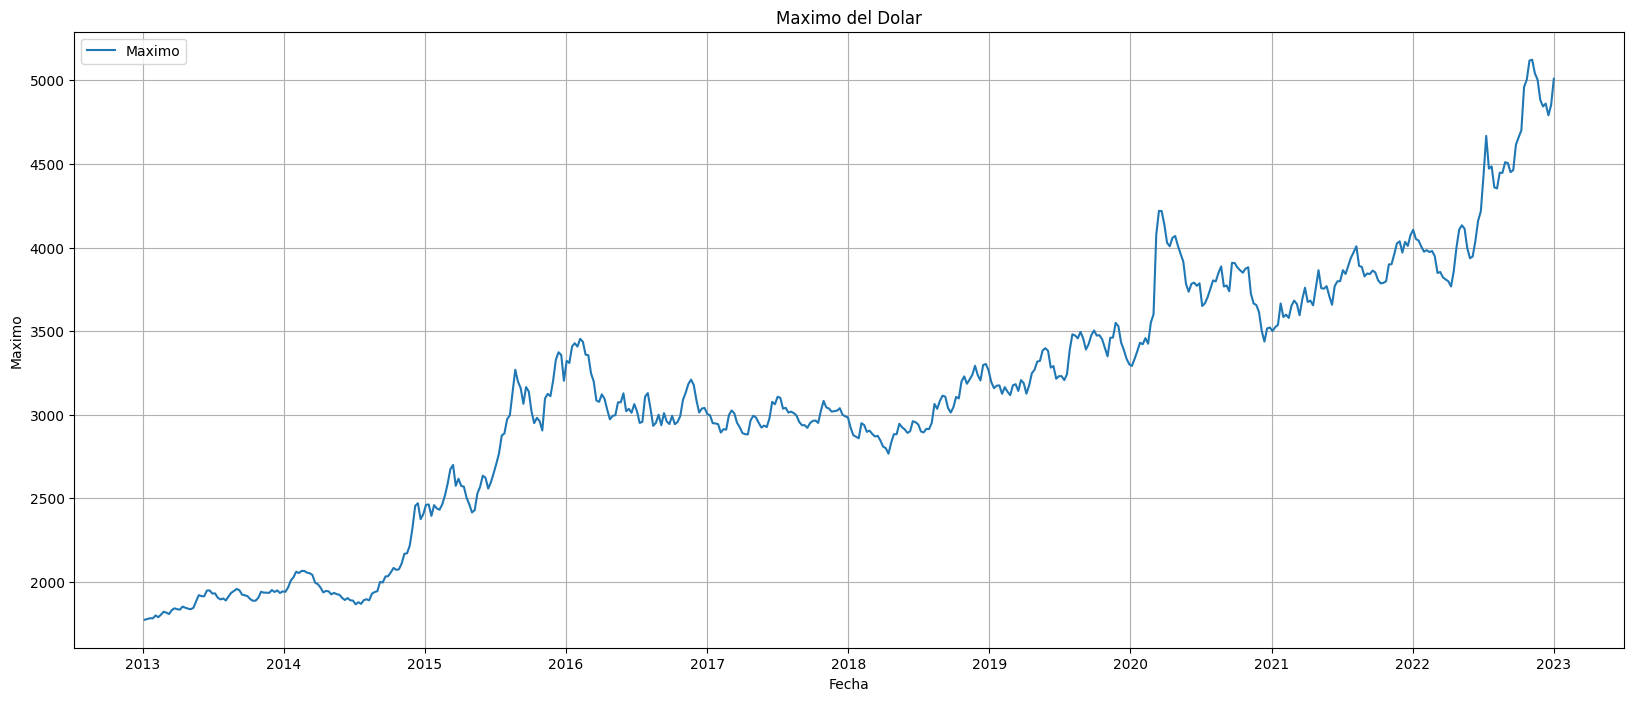

In [36]:
# Graficar la señal de maximo
plt.figure(figsize=(20, 8))
plt.plot(df['Fecha'], df['Maximo'], label='Maximo')
plt.xlabel('Fecha')
plt.ylabel('Maximo')
plt.title('Maximo del Dolar')
plt.legend()
plt.grid()
plt.show()


Como se mostraba en la grafica que mostraba la evolución del precio del dolar, el precio máximo con el que cierra puede estar influenciado tanto por los factores socio-economicos como por picos momnetáneos del mercado, son dos graficas muy similares lo que da a entender que la tendencia al alza del precio se reflejaba en sus valores de cierre los cuales también tiene una tendencia al incremento. Pero para poder decir esto con mayor propiedad es posible hacer una correlación entre las señales de precio y máximo.


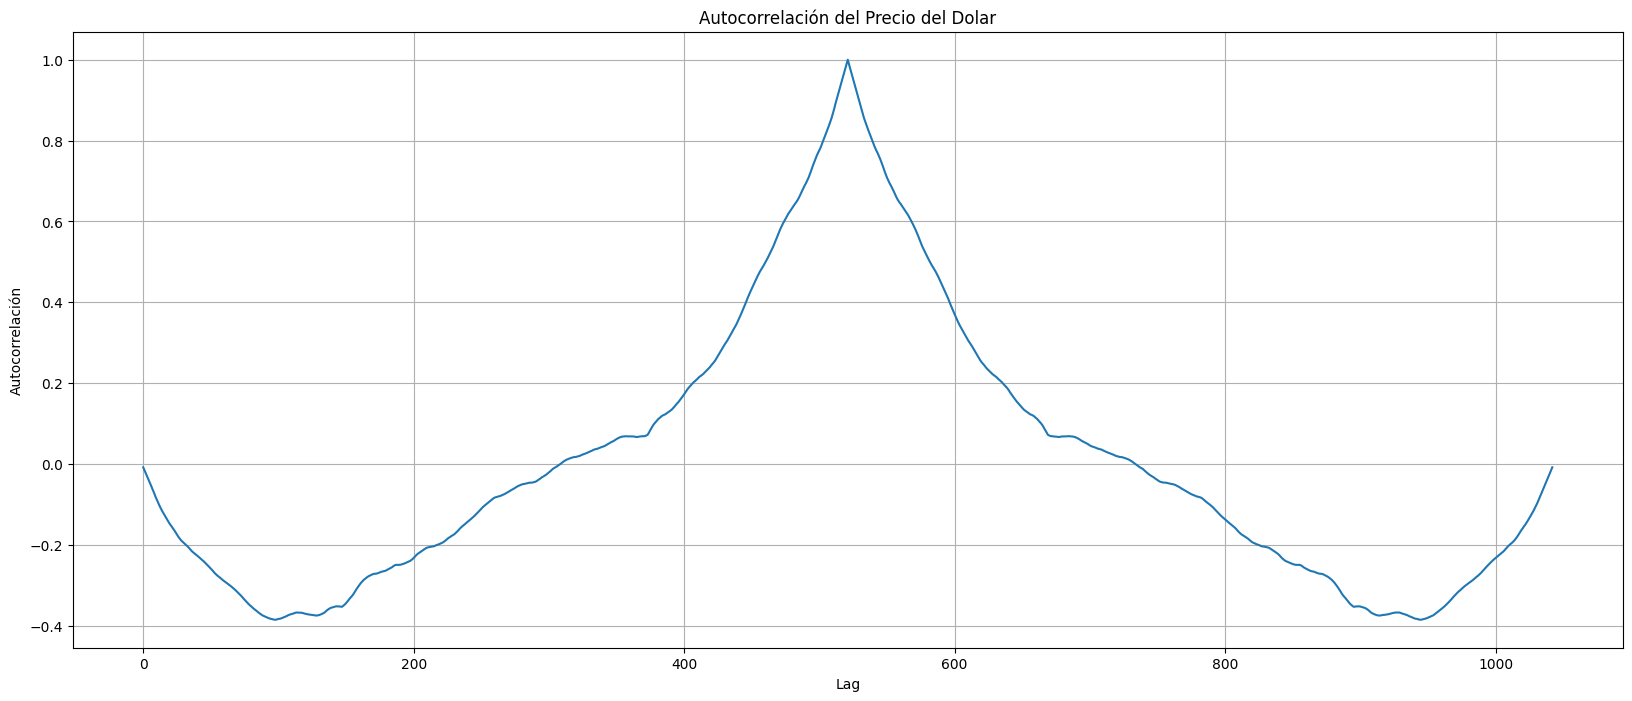

Correlación entre Precio y Máximo: 0.9986


In [37]:
# autocorrelación de la señal del precio

precio = df['Precio'].apply(extract_currency).astype(float)

# Autocorrelación
autocrr = np.correlate(precio - precio.mean(), precio - precio.mean(), mode='full')

# Normalizar la autocorrelación
autocrr /= np.max(autocrr)

# grafica de la autocorrelacion
plt.figure(figsize=(20, 8))
plt.plot(autocrr)
plt.xlabel('Lag')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelación del Precio del Dolar')
plt.grid()
plt.show()



maximo = df['Maximo'].apply(extract_currency).astype('float')

correlacion = np.corrcoef(precio, maximo)[0, 1]
print(f"Correlación entre Precio y Máximo: {correlacion:.4f}")

De este valor de autocorrelación se puede decir que hay una alta dependencia de valores pasados (Una especie de memoria) esto se ve reflejado en la curva negativa, lo que indica que los valores del dolar se mueven en dirección contraria a su valor pasado, lo que se conoce como una anticorrelación, este tipo de comportamientos indica que el comportamiento del precio del dolar no es completamente aleatorio, si no que sigue una dinámica con cierta memoria lo que en algunas ocasiones permite el analisis y las predicciones de los economistas. 

Además que la correlación cruzada entre el máximo y el precio sea tan alta muestra lo mencionado anteriormente, la alta dependencia del valor máximo con el valor del precio.

### 3. Filtro de media móvil

En muchos casos es útil eliminar ruido aleatorio de alta frecuencia para suavizar la señal de interés y observar el comportamiento más general de la señal. El filtro de media móvil (Moving Average, MA) es un filtro que permite realizar este proceso. En este caso se utilizará para suavizar las señales.

Este filtro tiene la siguiente ecuación en diferencias:


$$y[n] = \frac{1}{L} \sum_{i=0}^{L-1} x[n - i]$$

donde \(L\) es el número de puntos usados (orden del filtro), \(x[n]\) es la señal de entrada y \(y[n]\) es la señal de salida.

Para generar los coeficientes de un filtro de media móvil con \(L\) puntos, se puede utilizar el siguiente código:

```python
coefs = np.ones(L) / float(L)
```

Este filtro tiene función de transferencia:

$$
H(z) = \frac{1}{L} \cdot \frac{1 - z^{-L}}{1 - z^{-1}} = \frac{1}{L} \cdot \frac{z^{L-1} (z - 1)}{z^{L-1} (z - 1)}
$$

Para representar el denominador, el numerador y la respuesta natural de esta función de transferencia en Python se puede utilizar el siguiente código:

```python
num = np.zeros(L)
num[0] = 1.0 / L
num[-1] = -1.0 / L
den = np.zeros(L)
den[0] = 1
den[1] = -1
```

Los ceros están determinados por las raíces de la ecuación \(z^L - 1 = 0\), es decir, \(z^L = 1\). Las raíces se pueden encontrar con base en que \(e^{j2\pi k} = 1\) para cualquier \(k\) entero. Las raíces serán:

$$
z_k = e^{j2\pi k / L}
$$


### Procedimiento

1. Diseñe un filtro de media móvil con 3 diferentes valores de \(L\) en el rango de 5 a 70, calcule la respuesta de la señal **Máximo** (obtenida en el punto 2.1.6) ante dicho filtro y grafique la señal resultante usando subplots (se puede utilizar el vector de tiempos generado anteriormente).  
    **¿Con cuál considera que se visualiza y se podría analizar mejor la información?**  
    **Tip:** Para calcular la salida se usa la convolución:  
    ```python
    senal_smooth = np.convolve(senal, coefs, mode='same')
    ```  
    Donde `senal` es el vector con la señal.  
    **¿Por qué se debe usar `mode='same'`?**

2. Importe las funciones del archivo `ztrans.py` incluido con esta guía (asegúrese de ubicarlo en la misma carpeta del Notebook), las cuales calculan la respuesta en frecuencia y fase, respuesta al escalón, y al impulso.  
    **Tip:** Para hacerlo utilice el siguiente comando:  
    ```python
    from ztrans import *
    ```

3. Utilice la función `impz` para graficar y analizar la respuesta al impulso y al escalón del filtro de media móvil.  
    **¿Qué me indica la respuesta al impulso?**  
    Compare los resultados con \(L = 6\) y \(L = 25\).  
    **Tip:** Para usarla utilice el siguiente comando:  
    ```python
    impz(num, den)
    ```

4. Utilice la función `mfreqz` para graficar y analizar la respuesta en frecuencia del filtro de media móvil.  
    **¿Qué tipo de filtro es?**  
    **¿Cómo es su respuesta en fase?**  
    Compare los resultados con \(L = 6\) y \(L = 25\).  
    **Tip:** Para usarla utilice el siguiente comando:  
    ```python
    mfreqz(num, den)
    ```


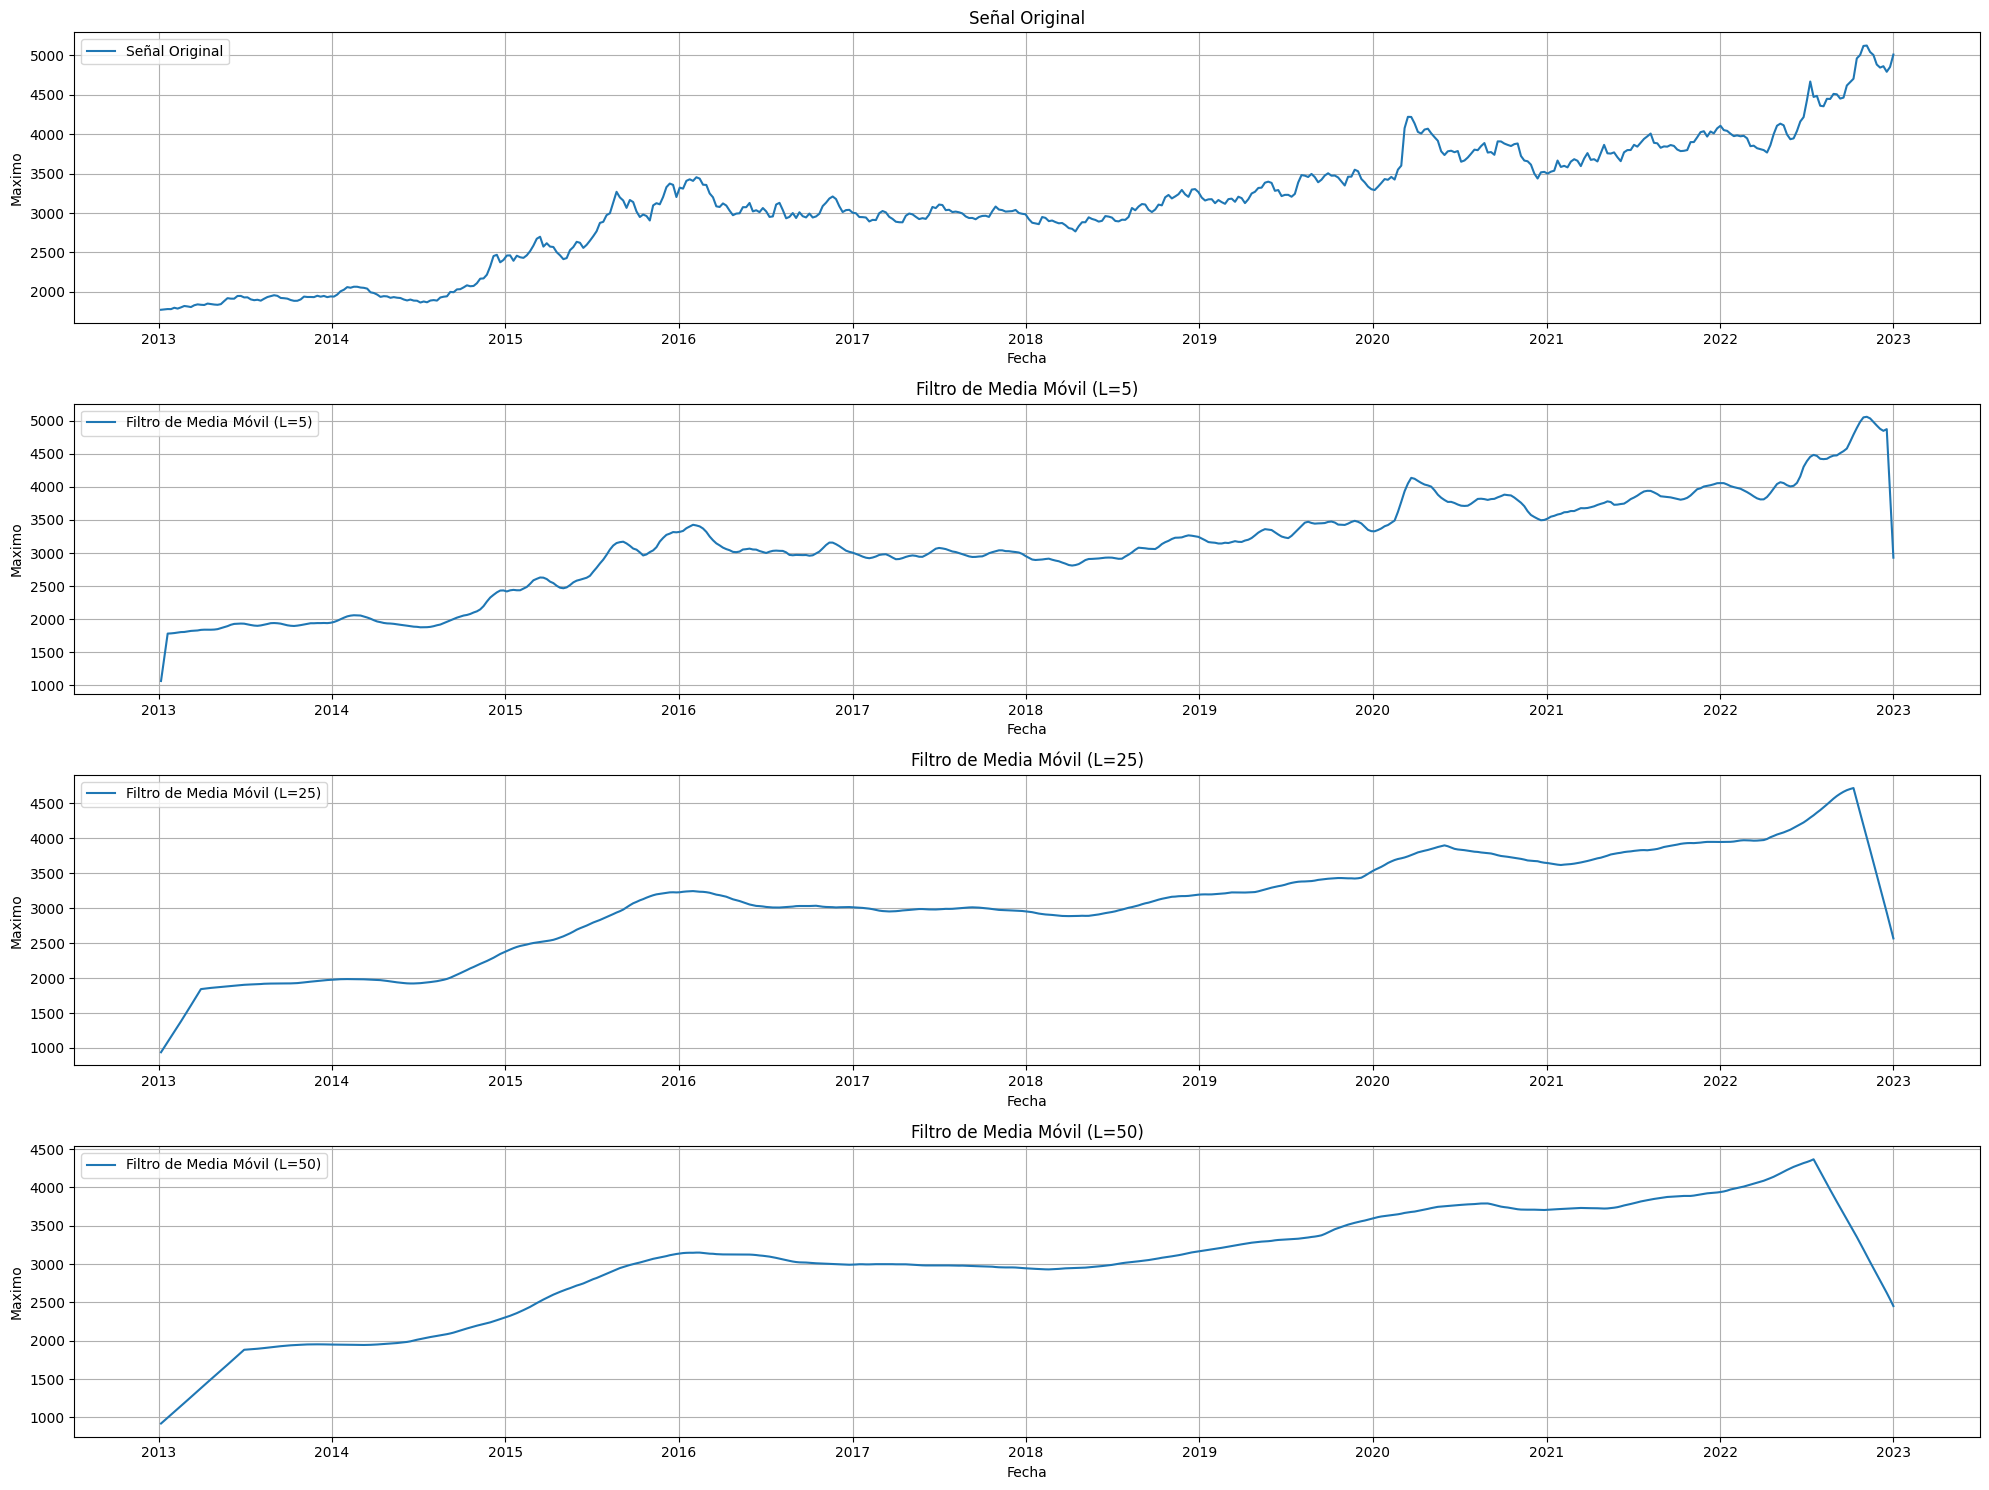

In [41]:
# señal maximo
senal_maximo = df['Maximo'].apply(extract_currency).astype(float)

L_valores = [5, 25, 50]

# filtro de media movil

filtered_signals = []
for L in L_valores:
    h = np.ones(L) / L
    y = np.convolve(senal_maximo, h, mode='same')
    filtered_signals.append(y)


# graficar la señal original y la señal filtrada
plt.figure(figsize=(20, 15))
plt.subplot(4, 1, 1)
plt.plot(df['Fecha'], senal_maximo, label='Señal Original')
plt.xlabel('Fecha')
plt.ylabel('Maximo')
plt.title('Señal Original')
plt.legend()
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(df['Fecha'], filtered_signals[0], label='Filtro de Media Móvil (L=5)')
plt.xlabel('Fecha')
plt.ylabel('Maximo')
plt.title('Filtro de Media Móvil (L=5)')
plt.legend()
plt.grid()

plt.subplot(4, 1, 3)
plt.plot(df['Fecha'], filtered_signals[1], label='Filtro de Media Móvil (L=25)')
plt.xlabel('Fecha')
plt.ylabel('Maximo')
plt.title('Filtro de Media Móvil (L=25)')
plt.legend()
plt.grid()


plt.subplot(4, 1, 4)
plt.plot(df['Fecha'], filtered_signals[2], label='Filtro de Media Móvil (L=50)')
plt.xlabel('Fecha')
plt.ylabel('Maximo')
plt.title('Filtro de Media Móvil (L=50)')
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()



Se utiliza el modo same ya que se quiere que la salida tenga el mismo tamaño que la señal original. 

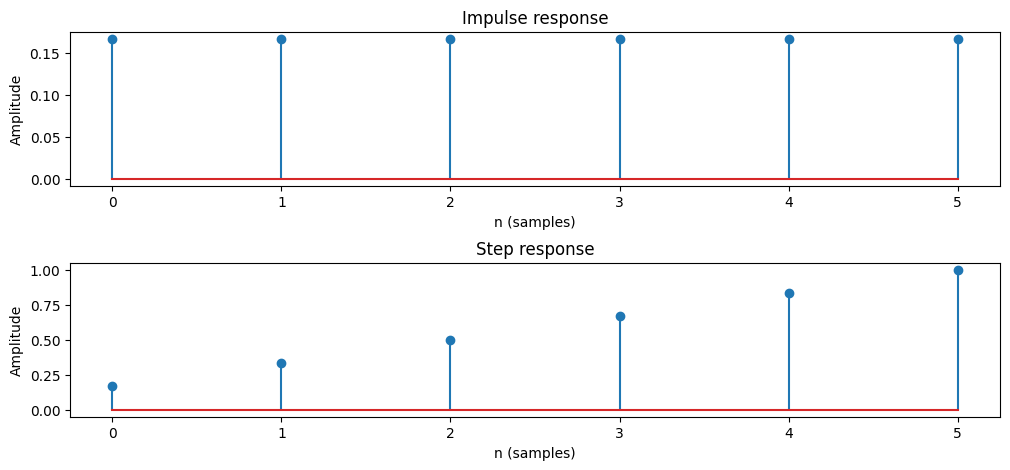

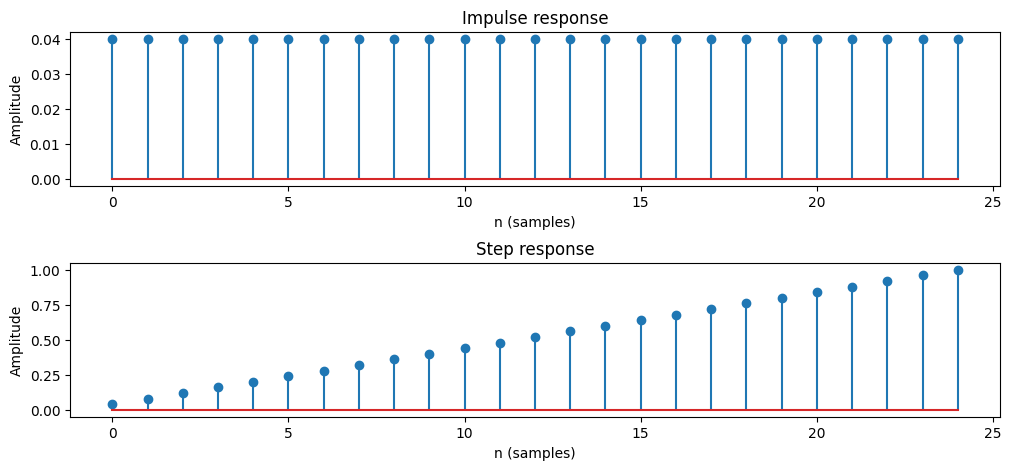

In [45]:
from ztrans import *

# Respuesta del filtro de media movil L6 y L25
L6 = 6 
num6 = np.ones(L6) / L6

L25 = 25
num25 = np.ones(L25) / L25

den = [1]

# Respuesta al impulso
impz(num6, den)
impz(num25, den)




En la respuesta al impulso de los filtro de media móvil con  $ L = 6$ y $L = 25$ se observa que los coedicientes tienen valores constantes de $0.166$ y $0.04$ respectivamente, lo que la respuesta al escalón del filtro es distribuir el valor del impulso de entrada equitativamente entre los coeficientes de L, cumpliendo asi su función de promediar los últimoms L valores de la señal de entrada. 

Respecto a la respuesta al escalón, se evidencia una acumulación prograsiva del promedio a lo largo de las primeras L muestras, es decir, la salida del filtro aunmenta gradualmente hasta alcanzar un valor estable en $1$ lo cual ocurre al sumar exactamente L muestras. Esta respuesta confirma el comportamiento típico de media móvil como suavizador de señales. 

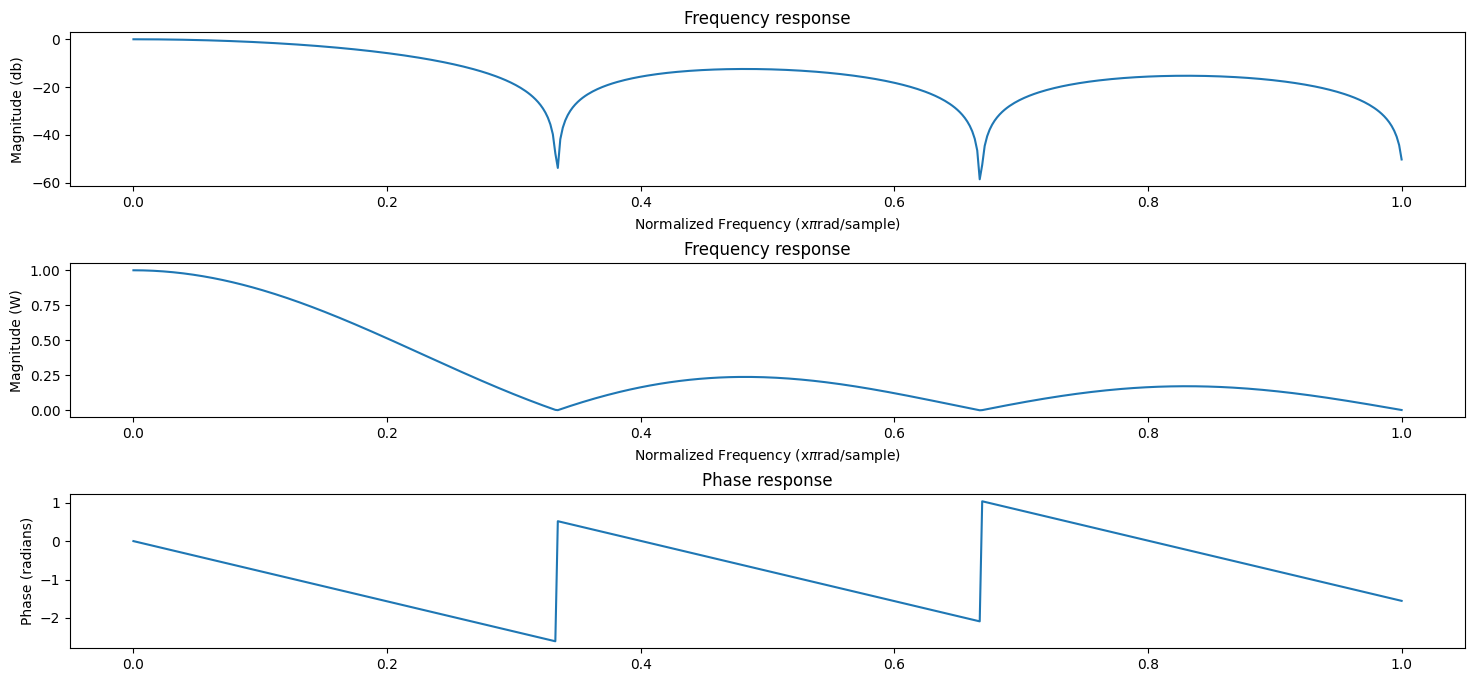

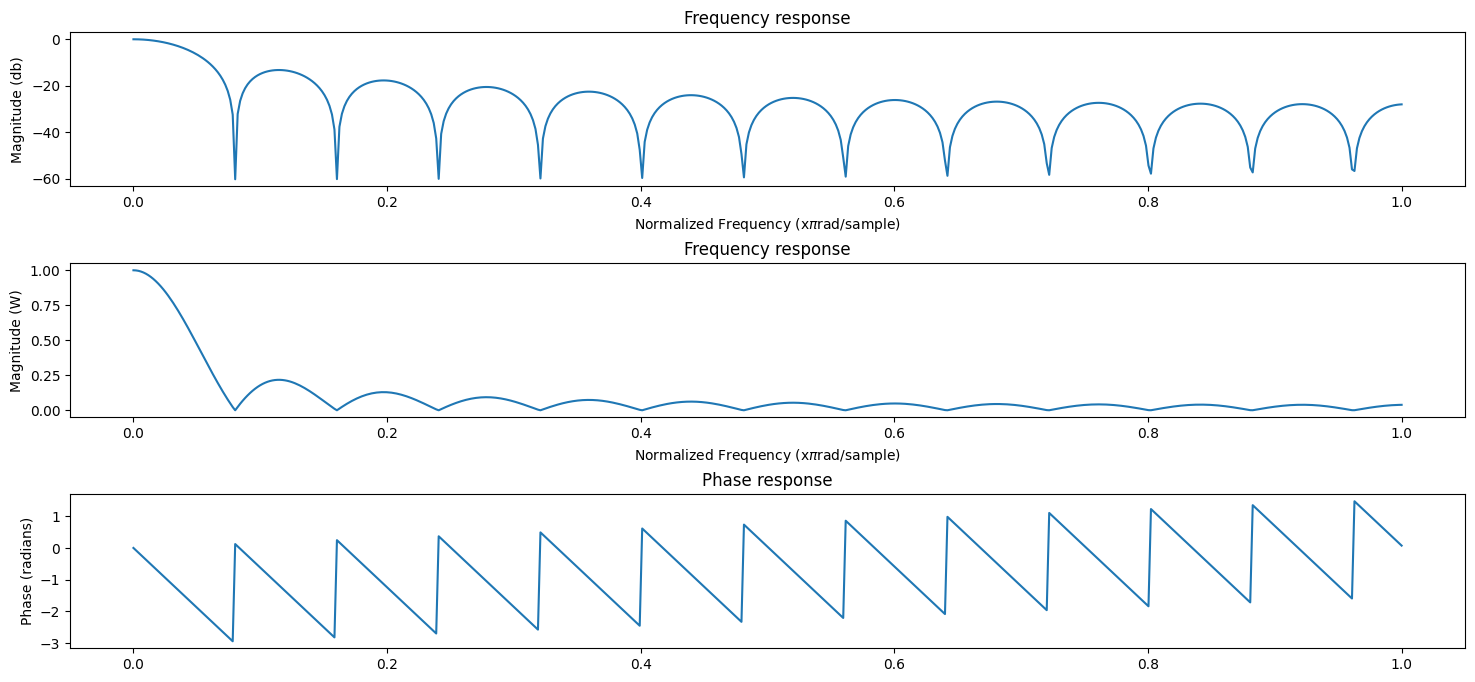

In [43]:
mfreqz(num6, den)
mfreqz(num25, den)

Se puede observar que se trata de un filtro pasabajas, dejando pasar tendencias lentas e impidiendo el paso de frecuencias muy altas, frecuencias que generalmente representan ruido o cambios bruscos de las señales. 

Este comportamiento se hace evidente al comparar las respuestaws con diferentes longitudes L, se puede observar que a medida de que se aumenta el orden del filtro este se vuelve mas estricto con respecto a las frecuencias que deja pasar, suavizando aun mas la señal y en algunos casos perdiendo información de detalles o fluctuaciones rapidas que pueden contener información relevante de la señal. 

Por otro lado, la respuesta de la fase es lineal, lo cual significa que no distorsiona la forma de la onda, lo único que introduce es un retraso uniforme. 

### 4. Filtro de primera diferencia

En muchos casos es útil analizar la tasa a la que cambia alguna variable. Para una señal continua se utiliza la derivada. En el caso de señales en tiempo discreto se utiliza el filtro de primera diferencia, el cual tiene como ecuación en diferencias:

$$
y[n] = x[n] − x[n − 1]
$$

Los coeficientes de este filtro se pueden generar con la siguiente instrucción:

```python
difcoefs = [1, -1]
```

Y su función de transferencia es:

$$
H(z) = 1 − z^{-1} = \frac{z - 1}{z}
$$

Para representar el denominador y el numerador de esta función de transferencia en Python se puede utilizar el siguiente código:

```python
num = [1, -1]
den = [1, 0]
```

#### Procedimiento

1. Mediante la función de convolución utilizada anteriormente, calcule la derivada de la señal con el filtro de primera diferencia, grafique y analice brevemente la señal resultante.  
    **¿Qué me indica esta señal?**

2. Utilice la función `impz` para graficar y analizar la respuesta al impulso y al escalón del filtro de primera diferencia.  
    **¿Qué me indica la respuesta al impulso?**

3. Utilice la función `mfreqz` para graficar y analizar la respuesta en frecuencia del filtro de primera diferencia.  
    **¿Qué tipo de filtro es?**  
    **¿Cómo es la respuesta de fase?**


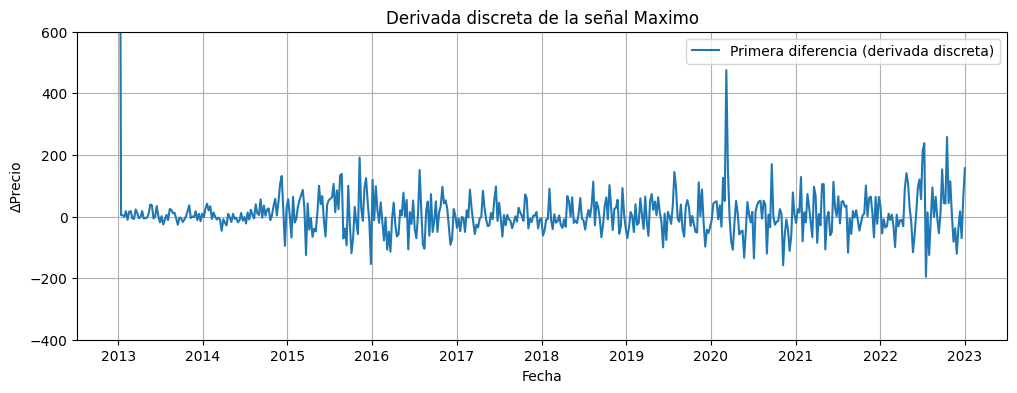

In [54]:
# Coeficientes del filtro de primera diferencia
difcoefs = [1, -1]

# Aplicar convolución a la señal 'Maximo'
senal_max = df['Maximo'].apply(extract_currency).astype(float).values
tiempo = pd.to_datetime(df['Fecha'])

# Derivada discreta de la señal
senal_derivada = np.convolve(senal_max, difcoefs, mode='same')

# Graficar
plt.figure(figsize=(12, 4))
plt.plot(tiempo, senal_derivada, label='Primera diferencia (derivada discreta)')
plt.title('Derivada discreta de la señal Maximo')
plt.xlabel('Fecha')
plt.ylabel('ΔPrecio')
plt.ylim(-400, 600)
plt.legend()
plt.grid(True)
plt.show()

Esta señal muestra los cambios diarios del precio del dólar. Los valores positivos indican que el dólar subió respecto al día anterior, mientras que los valores negativos muestran que el dólar bajó. Los valores grandes (por ejemplo, el observado a inicios de 2020) reflejan cambios bruscos en el valor del dólar, lo cual es coherente con las primeras gráficas obtenidas y con el análisis previamente realizado.

Este filtro es útil para detectar comportamientos como saltos, caídas abruptas y periodos de estabilidad a lo largo del tiempo.

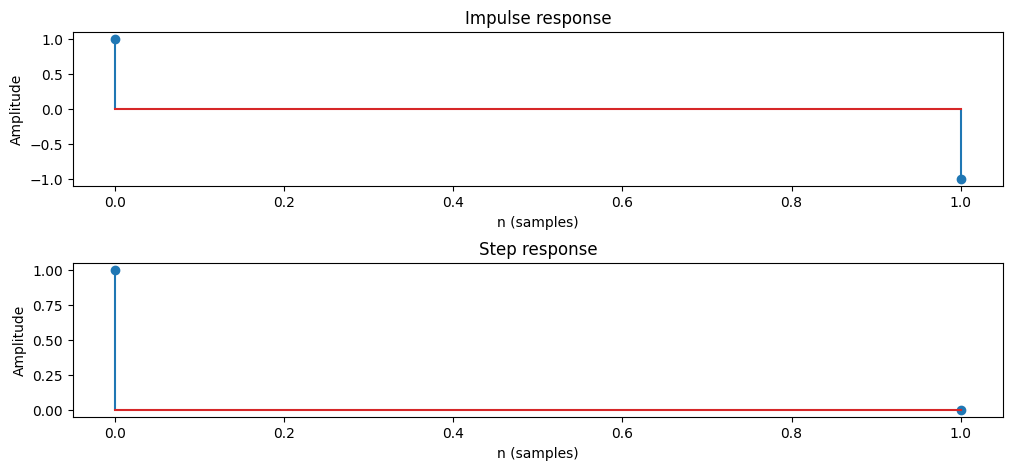

In [55]:
num = [1, -1]
den = [1, 0]  # porque H(z) = (1 - z^-1)

impz(num, den)


La respuesta al impulso indica cambios entre muestras, es por eso que detecta variaciones puntuales en la señal, respondiendo con un valor positivo seguido de uno negativo

Por otro ladom la respuesta al escalon indica el primer cambio, lo que significa que el filtro detecta el inicio del cambio pero luego responde con un valor constante, dado que las siguientes muestras no presentan variaciones respecto a la muestra anterior. Esto quiere decir que el filtro elimina las componenetes constantes lo que lo hace muy útil para analizar movimientos de la señal.

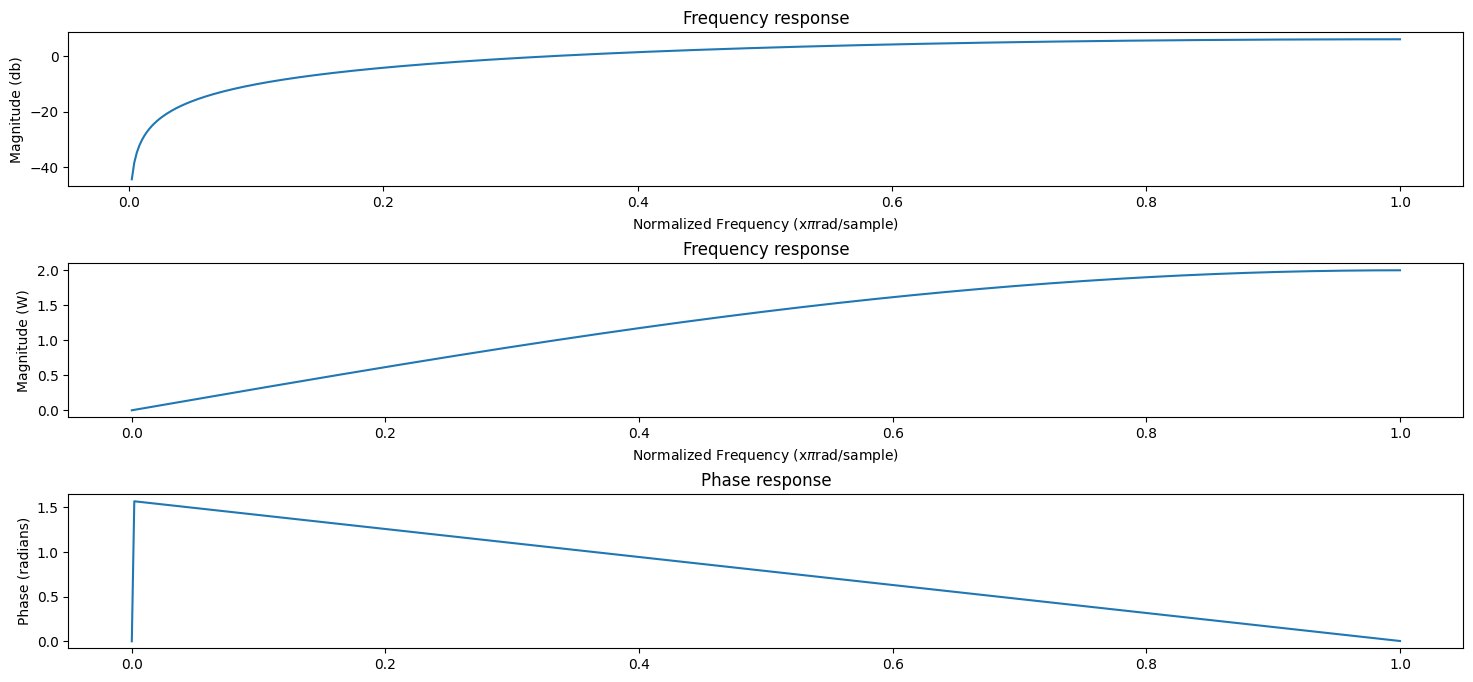

In [49]:
mfreqz(num, den)


Por la forma de la respuesta en frecuencia se puede inferir que es un filtro pasa altas, lo que quiere decir que atenúa componentes lentas, como las tendencias y resalta cambios rápidos en la señal. Por su respuesta en frecuencia se puede decir que no es ideal para señales donde se necesite preservar la forma original, pues muestra un comportamiento no lineal, lo que en otrasd palabras puede significar que introduzca distorsiones temporales. 

# Conclusiones.

* En el análisis de una señal, es fundamental considerar tanto su comportamiento matemático como el contexto real que la genera. En este caso, una señal que representa el precio del dólar y su variación puede estar influenciada por múltiples factores sociales, económicos y políticos. No obstante, herramientas como la correlación cruzada, autocorrelación, y los filtros de media móvil y primera diferencia permiten realizar un análisis más riguroso y objetivo del comportamiento de dicha señal. 

* El análisis de correlaciones permitió identificar relaciones significativas entre señales. Por ejemplo, la autocorrelación reveló una fuerte dependencia temporal, indicando que el valor del dólar en un día está altamente influenciado por su valor en días anteriores. Por otro lado, la correlación cruzada mostró la alta similitud entre la señal del precio y el valor máximo diario, lo cual era esperable, pero se validó cuantitativamente.

* Los filtros de media móvil, por su naturaleza de filtros pasabajas, suavizan la señal al eliminar variaciones rápidas. Si bien esto puede implicar una pérdida de información relevante cuando se usan órdenes muy altos (valores grandes de LL), también permite observar tendencias generales de forma más clara. En este estudio, el filtro evidenció de manera notoria la tendencia de alza del precio del dólar a lo largo del tiempo.

* Por otro lado, los filtros de primera diferencia actúan como filtros pasaalta, eliminando las componentes lentas de la señal y realzando los cambios abruptos. Esto los hace útiles para identificar saltos repentinos, caídas bruscas o periodos de inestabilidad. En este análisis, el filtro permitió observar con claridad los días en los que ocurrieron variaciones significativas del dólar, como durante la pandemia o eventos políticos relevantes.
